<a href="https://colab.research.google.com/github/mugilan0606/Fake-News-Prediction-using-machine-learning-approaches/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd #data processing
import re
import string

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mugilana","key":"38b98866d226958d966d23d3b2d80455"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c fake-news

 71% 33.0M/46.5M [00:00<00:00, 103MB/s] 
100% 46.5M/46.5M [00:00<00:00, 124MB/s]


In [ ]:
from zipfile import ZipFile

file = "fake-news.zip"

with ZipFile(file, 'r') as zip:
  zip.extractall()

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#DATA ANALYSIS

In [ ]:
print(train.shape)
print(test.shape)

(20800, 5)
(5200, 4)


In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
class_labels  = train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

Freq [10387, 10413]
number {0, 1}


In [ ]:
#We can see that the number of fake news is 10,413 and the number of True news is 10,387

In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
print("Null values in train data:")
print(train.isnull().sum())
print('\n')
 
print("Null values in test data:")
print(test.isnull().sum())

Null values in train data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64


Null values in test data:
id          0
title     122
author    503
text        7
dtype: int64


In [ ]:
test=test.fillna(' ') 
train=train.fillna(' ') 


In [ ]:
train.head()
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
#Here, we show the top 10 most common words
#from sklearn.feature_extraction.text import CountVectorizer
#def get_top_n_words(corpus, n=None):
#    vec = CountVectorizer().fit(corpus)
#    bag_of_words = vec.transform(corpus)
#    sum_words = bag_of_words.sum(axis=0) 
#    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#    return words_freq[:n]
#common_words = get_top_n_words(train['text'], 10)
#for word, freq in common_words:
#    print(word, freq)

In [ ]:
#we can see that since the data is not processed, the top frequent words are stop words.

#DATA PREPROCESSING

In [ ]:
#Merging the colums
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']
#We need only 2 rows (total, label). so we remove the rest of the columns
train = train[['total','label']]
train.head()

,total,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Consortiumne...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [ ]:
train.head()

,total,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Consortiumne...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [ ]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop=stopwords.words("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
for index,row in train.iterrows(): 
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #take words only, remove symbols
    
    words = nltk.word_tokenize(sentence) #tokenizing the sentence
    
    words = [w for w in words if not w in stop]  #removing the stopwords
##    
    #after removing the stopwords, applying the WornNet Lemmatizer
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
       
    # at the end, again putting the filter_sentence back into the training document at the same position    
    train.loc[index,'total'] = filter_sentence

In [ ]:
#stemmer = PorterStemmer() 
#
#def preprocess(sentence):
#    sentence=str(sentence)
#    sentence = sentence.lower()
#    sentence=sentence.replace('{html}',"") 
#    cleanr = re.compile('<.*?>')
#    cleantext = re.sub(cleanr, '', sentence)
#    rem_url=re.sub(r'http\S+', '',cleantext)
#    rem_num = re.sub('[0-9]+', '', rem_url)
#    tokenizer = RegexpTokenizer(r'\w+')
#    tokens = tokenizer.tokenize(rem_num)  
#    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
#    stem_words=[stemmer.stem(w) for w in filtered_words]
#    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
#    return " ".join(filtered_words)

In [ ]:
#train['total']=train['total'].apply(preprocess)

In [ ]:
#now we check for the top 10 frequent words.
#def get_top_n_words(corpus, n=None):
#    vec = CountVectorizer(stop_words = 'english').fit(corpus)
#    bag_of_words = vec.transform(corpus)
#    sum_words = bag_of_words.sum(axis=0) 
#    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#    return words_freq[:n]

#common_words = get_top_n_words(train['total'], 20)
#for word, freq in common_words:
#    print(word, freq)

In [ ]:
#we can see that these are meaningful words.
#def wordopt(text):
#    text = text.lower()
#    text = re.sub('\[.*?\]', '', text)
#    text = re.sub("\\W"," ",text) 
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#    text = re.sub('\n', '', text)
#    text = re.sub('\w*\d\w*', '', text)    
#    return text
#train['total'] = train['total'].apply(wordopt)
#train.head()

#Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train = train['total']
Y_train = train['label']

In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
#tfidf = TfidfTransformer(norm="l2")
#tfidf.fit(X_train)
#tf_idf_matrix = tfidf.fit_transform(X_train)

In [ ]:
#tf_idf_matrix.toarray().shape

#Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(freq_term_matrix, Y_train, random_state=0)

In [ ]:
print(X_train.shape, y_train.shape)

(15600, 220387) (15600,)


In [ ]:
print(X_test.shape, y_test.shape)

(5200, 220387) (5200,)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, random_state=110, max_iter=300)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, max_iter=300, random_state=110)

In [ ]:
pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression on test set: 0.97077


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2564
           1       0.97      0.98      0.97      2636

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



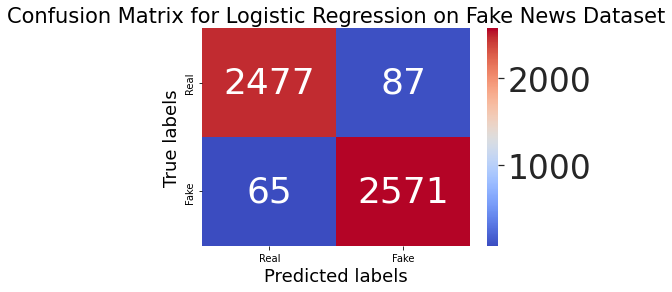

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, pred)

ax = plt.subplot()
sns.set(font_scale=3.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm", fmt="g");  

label_font = {'size':'18'}  
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'} 
ax.set_title('Confusion Matrix for Logistic Regression on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('Logistic.png')

#SVM

In [ ]:
from sklearn import svm, metrics

svm_ = svm.SVC(kernel="linear",probability=True)

In [ ]:
svm_.fit(X_train,y_train)
pred_svm = svm_.predict(X_test)
print('Accuracy of SVM on test set: {:.5f}'.format(svm_.score(X_test, y_test)))

Accuracy of SVM on test set: 0.96673


In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2564
           1       0.96      0.97      0.97      2636

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



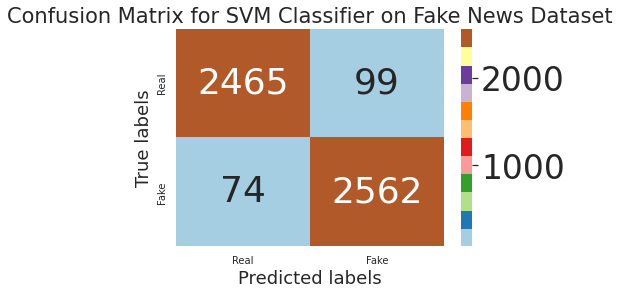

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, pred_svm)

ax = plt.subplot()
sns.set(font_scale=3.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Paired", fmt="g");  

label_font = {'size':'18'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}
ax.set_title('Confusion Matrix for SVM Classifier on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('SVM.png')

#XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
#clf.fit(x_train,y_train)
pred_XGBoost = clf.predict(X_test)
print('Accuracy of XGBoost on test set: {:.5f}'.format(clf.score(X_test, y_test)))

Accuracy of XGBoost on test set: 0.96962


In [ ]:
print(classification_report(y_test,pred_XGBoost))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2564
           1       0.96      0.98      0.97      2636

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



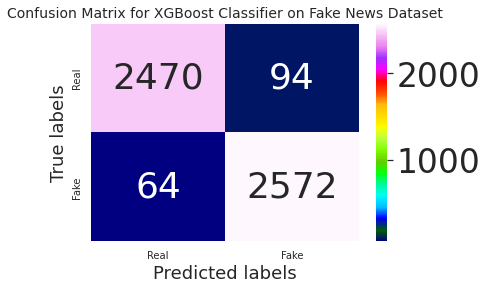

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, pred_XGBoost)

ax = plt.subplot()
sns.set(font_scale=3.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="gist_ncar", fmt="g");  

label_font = {'size':'18'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'14'}  
ax.set_title('Confusion Matrix for XGBoost Classifier on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('XGBoost.png')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


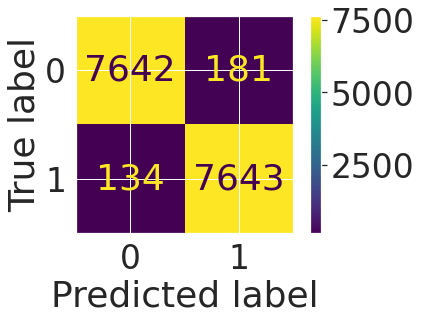

In [ ]:
#plot_confusion_matrix(clf,X_train,y_train)

#Computing ROC_AUC Curve

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score 

In [ ]:
lg_pred=logreg.predict_proba(X_test)
pred_svm=svm_.predict_proba(X_test)
pred_XGBoost=clf.predict_proba(X_test)
lr_probs=lg_pred[:,1]
svm_probs=pred_svm[:,1]
XG_probs=pred_XGBoost[:,1]

lr_auc=roc_auc_score(y_test,lr_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
XG_auc=roc_auc_score(y_test,XG_probs)

In [ ]:
print('AUC of Logistic regression =%.3f' % (lr_auc))
print('AUC of SVM =%.3f' % (svm_auc))
print('AUC of XGBoost =%.3f' % (XG_auc))

AUC of Logistic regression =0.994
AUC of SVM =0.993
AUC of XGBoost =0.995


In [ ]:
lr_fpr,lr_tpr, _ = roc_curve(y_test,lr_probs)
svm_fpr,svm_tpr, _ = roc_curve(y_test,svm_probs)
XG_fpr,XG_tpr, _ = roc_curve(y_test,XG_probs)

In [ ]:
import matplotlib.pyplot as plt


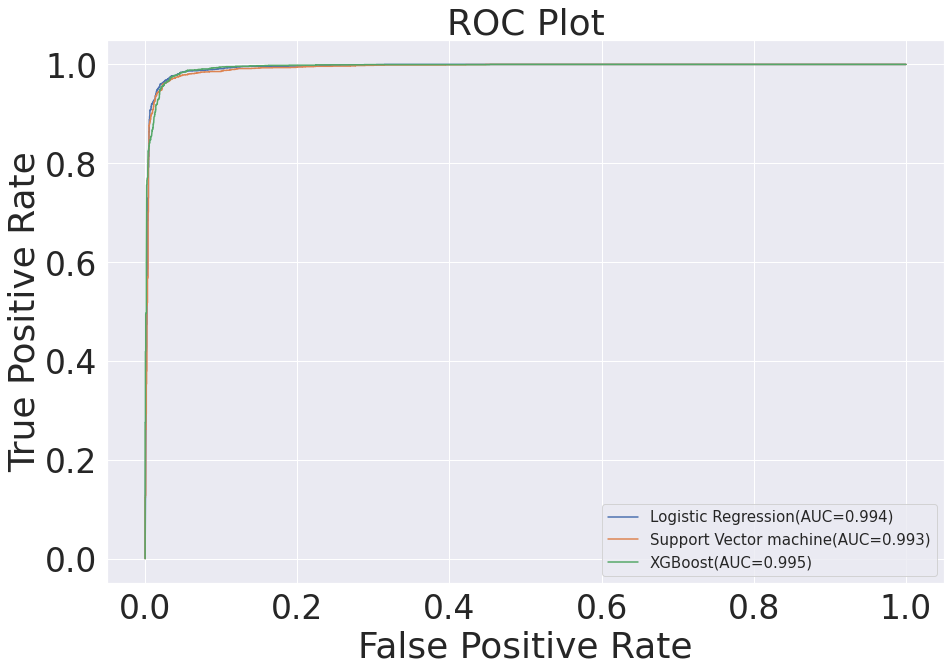

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(lr_fpr,lr_tpr,label='Logistic Regression(AUC=%0.3f)'%lr_auc)
plt.plot(svm_fpr,svm_tpr,label='Support Vector machine(AUC=%0.3f)'%svm_auc)
plt.plot(XG_fpr,XG_tpr,label='XGBoost(AUC=%0.3f)'%XG_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(fontsize=15)
plt.show()